K-means (Mall customer dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/K-means.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = dataset.iloc[:,2:5].values

Elbow method (手肘法)

In [ ]:
error = [] 
for i in range(2, 11): 
  kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans1.fit(X) 
  error.append(kmeans1.inertia_) 

#inertia_: Sum of squared distances of samples to their closest cluster center

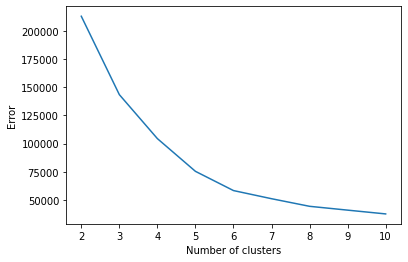

In [ ]:
plt.plot(range(2, 11), error)
plt.xlabel('Number of clusters')
plt.ylabel('Error') 
plt.show()

Silhouette coefficient (輪廓係數法)

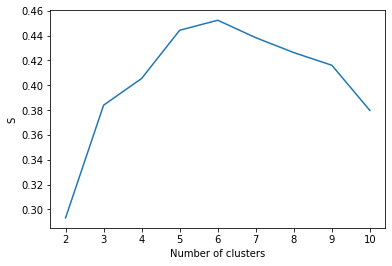

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for i in range(2,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(X)
    silhouette_avg.append(silhouette_score(X, kmeans2.labels_, metric='euclidean'))

plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('S')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
y_cluster = kmeans_model.fit_predict(X)

In [ ]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], s = 40 , color = 'blue', label = "data points")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.legend()
plt.show()


In [ ]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X[y_cluster == 0,0],X[y_cluster == 0,1],X[y_cluster == 0,2], alpha=0.5, s = 20 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_cluster == 1,0],X[y_cluster == 1,1],X[y_cluster == 1,2], alpha=0.5,s = 20 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_cluster == 2,0],X[y_cluster == 2,1],X[y_cluster == 2,2], alpha=0.5,s = 20 , color = 'green', label = "cluster 2")
ax.scatter(X[y_cluster == 3,0],X[y_cluster == 3,1],X[y_cluster == 3,2], alpha=0.5,s = 20 , color = 'yellow', label = "cluster 3")
ax.scatter(X[y_cluster == 4,0],X[y_cluster == 4,1],X[y_cluster == 4,2], alpha=0.5,s = 20 , color = 'purple', label = "cluster 4")
ax.scatter(X[y_cluster == 5,0],X[y_cluster == 5,1],X[y_cluster == 5,2], alpha=0.5,s = 20 , color = 'red', label = "cluster 5")
centers = kmeans_model.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s = 100 ,c='black', marker="v", label = "cluster center")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.legend()
plt.show()
